# HandWritten Digit Recognition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Input, Normalization, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

## Loading Data Sets

In [3]:
(X_train, Y_train), (X_test, Y_test) = load_data()

In [4]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

## Normalising Train Data Set

In [5]:
def normalize(data):
    return (data-np.mean(data))/np.std(data)

In [6]:
X_norm = normalize(X_train)

In [7]:
print(f"Before Normalization Max and Min: {np.max(X_train):0.2f}, {np.min(X_train):0.2f}")
print(f"After Normalization Max and Min: {np.max(X_norm):0.2f}, {np.min(X_norm):0.2f}")

Before Normalization Max and Min: 255.00, 0.00
After Normalization Max and Min: 2.82, -0.42


## Visualizing

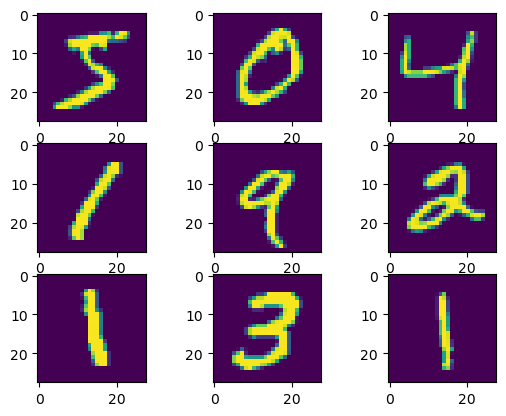

In [8]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])

## Building Model

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu", name="HiddenLayer1"),
    Dense(128, activation="relu", name="HiddenLayer2"),
    Dense(128, activation="relu", name="HiddenLayer3"),
    Dense(10, activation="softmax", name="OutputLayer")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               100480    
                                                                 
 HiddenLayer2 (Dense)        (None, 128)               16512     
                                                                 
 HiddenLayer3 (Dense)        (None, 128)               16512     
                                                                 
 OutputLayer (Dense)         (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

## Train Model

In [13]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0716 - accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0645 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0662 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0656 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0571 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0499 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0597 - accuracy: 0.9849
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0496 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0526 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

## Model Prediction on Train DataSet

In [14]:
prediction = model.predict(X_train)

1875/1875 [==============================] - 6s 3ms/step


In [15]:
y_hat = [np.argmax(i) for i in prediction]

In [16]:
y_hat[:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [17]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Measuring Performance on Test DataSet

In [18]:
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix
import seaborn as sns

In [19]:
prediction = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_hat = [np.argmax(i) for i in prediction]
y_hat[:10], Y_test[:10]

([7, 2, 1, 0, 4, 1, 4, 9, 5, 9],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [21]:
print(f"Accuracy Score = {accuracy_score(Y_test, y_hat)}")
print(f"R2 Score = {r2_score(Y_test, y_hat)}")

Accuracy Score = 0.9713
R2 Score = 0.9400491087362051


In [22]:
cm = confusion_matrix(Y_test, y_hat)
cm

array([[ 958,    1,    1,    0,    1,    1,   14,    1,    1,    2],
       [   0, 1123,    2,    0,    0,    4,    2,    0,    4,    0],
       [   5,    4,  985,    2,    5,    2,   18,    2,    9,    0],
       [   1,    0,    6,  974,    0,   13,    0,    3,    7,    6],
       [   1,    0,    0,    0,  965,    0,    8,    1,    2,    5],
       [   1,    0,    1,    7,    2,  864,   11,    0,    6,    0],
       [   2,    2,    0,    0,    1,    4,  947,    0,    2,    0],
       [   2,    5,   15,    3,    3,    1,    1,  982,    8,    8],
       [   3,    2,    2,    2,    4,    8,    4,    2,  944,    3],
       [   1,    2,    0,    3,   15,    6,    3,    4,    4,  971]],
      dtype=int64)

<Axes: >

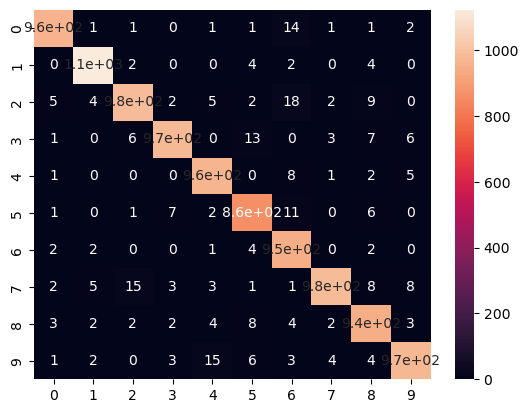

In [23]:
sns.heatmap(cm, annot=True)

## Save model

In [24]:
model.save('my_model.keras')
print("Done")

Done


## Load Model

In [25]:
from tensorflow.keras.models import load_model

In [26]:
new_model = load_model('my_model.keras')

In [27]:
predict = new_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


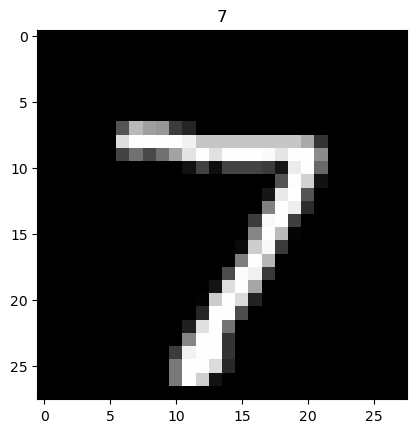

In [28]:
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")
plt.title(f"{np.argmax(predict[0])}")
plt.show()
print ()

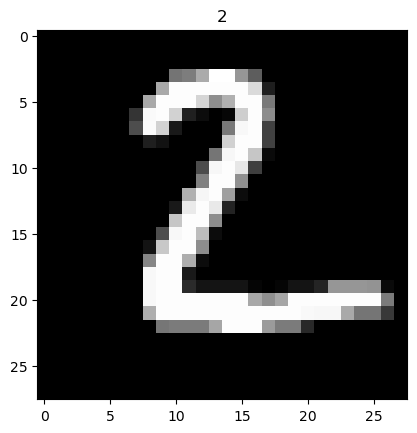

In [29]:
plt.imshow(X_test[1].reshape(28, 28), cmap="gray")
plt.title(f"{np.argmax(predict[1])}")
plt.show()
print ()

# Using HandWriiten Images

In [30]:
import cv2

In [31]:
image = cv2.imread('digits.PNG')
image[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

## image preprocessing

In [32]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
grey.shape

(106, 407)

In [33]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
thresh.shape

(106, 407)

In [34]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




----------------Contoured Image--------------------


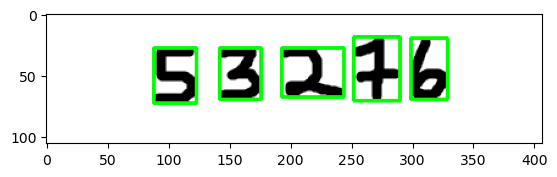

In [35]:
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (7, 7)
    resized_digit = cv2.resize(digit, (18, 18))
    
    # Padding the digit with 1 pixels of black color (zeros) in each side to finally produce the image of (8, 8)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

In [36]:
img = np.array(preprocessed_digits)

In [37]:
img[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  76, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 189,   0,   0,   0,   0,   0,
          0,   0],
       [  

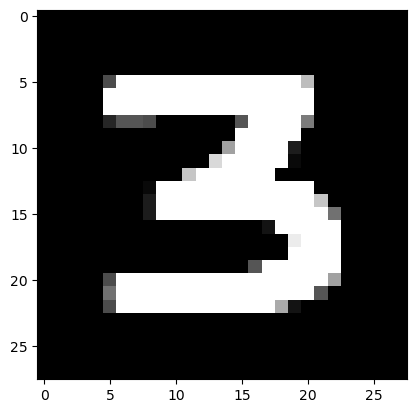

In [38]:
plt.imshow(img[1], cmap="gray")
plt.show()
print ()

In [39]:
img.shape

(5, 28, 28)

In [40]:
processed_img = img.reshape(img.shape[0], img.shape[1] * img.shape[1])

In [41]:
processed_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Prediction

In [42]:
predict = new_model.predict(processed_img)

1/1 [==============================] - 0s 146ms/step


In [43]:
predict

array([[4.1361073e-07, 9.7441976e-08, 9.9997127e-01, 2.6819564e-09,
        5.5804872e-08, 2.1927907e-19, 1.2091657e-06, 2.6136007e-05,
        6.5502451e-07, 1.7538753e-07],
       [0.0000000e+00, 2.2384044e-30, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 3.2876821e-28, 0.0000000e+00, 5.6048101e-30,
        1.4953108e-34, 1.2123231e-24],
       [0.0000000e+00, 0.0000000e+00, 6.6344092e-29, 3.1411412e-12,
        0.0000000e+00, 1.0000000e+00, 2.8090914e-35, 0.0000000e+00,
        9.2467663e-37, 3.9442938e-20],
       [3.6920650e-10, 1.0995558e-15, 8.7735826e-16, 2.2013269e-09,
        8.4607155e-11, 3.3849935e-06, 9.9999666e-01, 6.8000981e-27,
        5.1001930e-08, 6.1404491e-19],
       [2.0798542e-18, 1.3067016e-04, 4.5776633e-03, 2.7865760e-03,
        1.6774193e-09, 1.4622326e-11, 0.0000000e+00, 9.9250519e-01,
        2.3450216e-11, 5.1486772e-08]], dtype=float32)

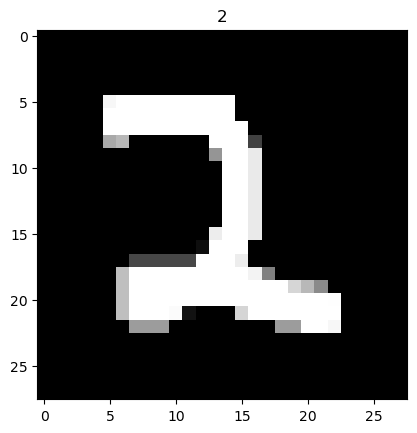

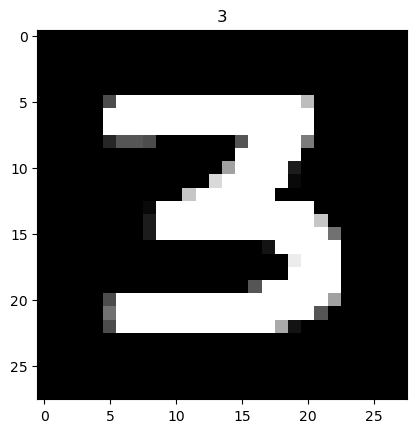

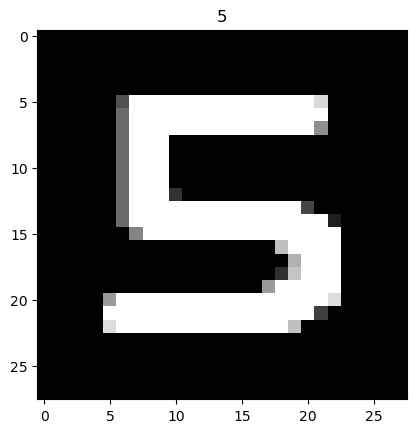

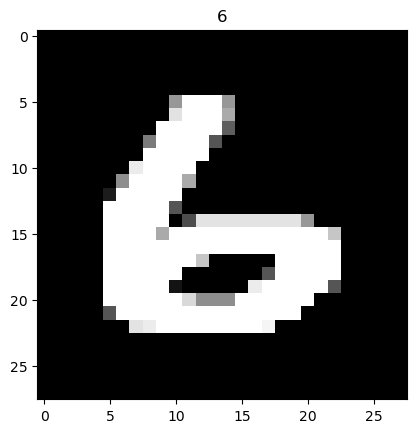

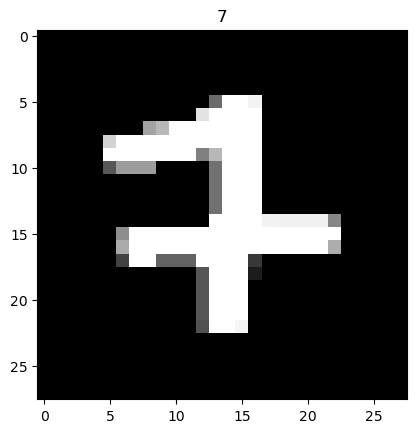

In [44]:
for i in range(len(img)):  
    plt.imshow(img[i], cmap="gray")
    plt.title(f"{np.argmax(predict[i])}")
    plt.show()
    print ()